<a href="https://colab.research.google.com/github/dkgulee/initiation-depplearning/blob/master/%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets  import load_diabetes

In [0]:
diabetes = load_diabetes()

In [6]:
diabetes

{'DESCR': '.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - Age\n      - Sex\n      - Body mass index\n      - Average blood pressure\n      - S1\n      - S2\n      - S3\n      - S4\n      - S5\n      - S6\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttps://www4.stat.ncsu.edu/~boos/var.select/

In [7]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [8]:
diabetes.data[0:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [9]:
diabetes.target[:3]

array([151.,  75., 141.])

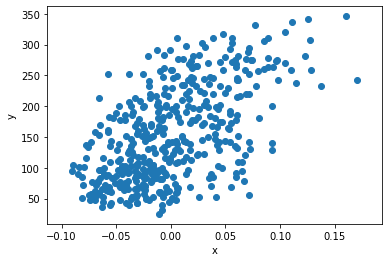

In [10]:
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:, 2], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [11]:
x = diabetes.data[:, 2]
y = diabetes.target
print(x)

[ 0.06169621 -0.05147406  0.04445121 -0.01159501 -0.03638469 -0.04069594
 -0.04716281 -0.00189471  0.06169621  0.03906215 -0.08380842  0.01750591
 -0.02884001 -0.00189471 -0.02560657 -0.01806189  0.04229559  0.01211685
 -0.0105172  -0.01806189 -0.05686312 -0.02237314 -0.00405033  0.06061839
  0.03582872 -0.01267283 -0.07734155  0.05954058 -0.02129532 -0.00620595
  0.04445121 -0.06548562  0.12528712 -0.05039625 -0.06332999 -0.03099563
  0.02289497  0.01103904  0.07139652  0.01427248 -0.00836158 -0.06764124
 -0.0105172  -0.02345095  0.06816308 -0.03530688 -0.01159501 -0.0730303
 -0.04177375  0.01427248 -0.00728377  0.0164281  -0.00943939 -0.01590626
  0.0250506  -0.04931844  0.04121778 -0.06332999 -0.06440781 -0.02560657
 -0.00405033  0.00457217 -0.00728377 -0.0374625  -0.02560657 -0.02452876
 -0.01806189 -0.01482845 -0.02991782 -0.046085   -0.06979687  0.03367309
 -0.00405033 -0.02021751  0.00241654 -0.03099563  0.02828403 -0.03638469
 -0.05794093 -0.0374625   0.01211685 -0.02237314 -0.

# 경사 하강법으로 학습하는 방법 알아보기
### 선형회귀의 목표 -> X(입력데이터) Y(타깃) 을 활용해서 A(기울기) b(절편)을 찾는 회귀 알고리즘이다 
### 경사하강법은 : 기울기(변화율)을 사용하여 모델을 조금씩 조정하는 초적화 알고리즘이다.

###예측값과 변화율에 대해 알아보자.
y= a+b  --> **y^ = wx + b**  
훈련데이터의 (x,y) 를통해  w ,b 를 찾는다 

### 훈련 데이터와 잘 맞는 w와 b를 찾는 방법
#### 1. 무작위로 w와 b를 정합니다.(무작위로 모델 만들기).
#### 2. x에서 샘플 하나를 선택하여 y^을 계산합니다.(무작위로 모델 예측하기).
#### 3. y^과 선택한 샘플의 진짜 y를 비교를 한다(예측한 값과 진짜 정답 비교하기, 틀릴확률99%)
#### 4. y^ 이  y와 더 가까워지도록 w,b를 조정한다(모델 조정하기).
#### 5. 모든 셈플을 처리할 떄 까지 다시 2~4 을 반복한다.


1. w와b 를 초기화하기

In [0]:
w = 1.0
b = 1.0

2. 훈련 데이터의 첫 번쨰 샘플 데이터로 y^ 얻기

In [13]:
y_hat = x[0] * w + b
print(y_hat)

1.0616962065186886


3. 타깃과 예측 데이터 비교하기
  첫 번쨰 샘플 x[0]에 대응하는 타깃값 y[0]을 출력하여 y_hat의 값과 비교한다.

In [14]:
print(y[0])

151.0


4. w 값 조절해 예측값 바꾸기
 이제 w와 b를 좀더 좋은 방향으로 바꿔보자.
 어떤 방향으로 바꾸면 y_hat이 y[0]에 가까워질 수 있을까요?
 가장 쉬운 방법은 w와 b를 조금씩 변경해서 y_hat이 증가하는지 또는 감소하는지 살펴보는 것이다.



In [15]:
w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b
print(y_hat_inc)

1.0678658271705574


5. w 값 조정한 후 예측값 증가 정도 확인하기


In [16]:
w_rate = (y_hat_inc - y_hat)/ (w_inc - w)
w_rate

0.061696206518688734

## 변화율로 가중치 업데이트하기

### 변화율이 양수일 떄 가중치를 업데이트하는 방법
 W값이 증가하면 y_hat이 증가
### 변화율이 음수일 떄 가중치를 업데이트하는 방법 
 w값이 증가하면 y_hat은 감소한다. -> w값이 감소하면 y_hat은 증가한다.
 w 에 w_rate를 더해주면 가중치가 업섿이트가 된다

In [17]:
w_new = w + w_rate
w_new

1.0616962065186888

## 변화율로 절편 업데이트하기
이번에는 절편 b에 대한 변화율을 구한 다음 변화율로 b를 업데이트하겠다. b를 0.1만큼 증가시킨 후 y_hat이 얼마나 증가했는지 계산하고 변화율도 계산한다.

In [19]:
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
print(y_hat_inc)

b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)

1.1616962065186887
1.0


변화율의 값을 보니 1이다. 즉 b가 1만큼 증가하면 y_hat 도 1만큼 증가한다.
즉. b를 업데이트하기 위해서 변화율이 1이므로 단순히 1을 더하면 된다.

In [21]:
b_new = b + 1
b_new

2.0

y_hat을 증가시켜야 하는 상황을 가정하고 w와 b를 업데이트하는 방법에 대해 알아보았다. 그런데 이방법은 조금 수동적인 방법이다.
- Y_hat이 y에 한참 미치지 못하는 값인 경우 , w와 b를 더 큰 폭으로 수정할 수 없다,(앞에서 변화율 만큼 수정을 했지만 특별한 기준을 정하기가 어렵다)
- y_hat이 y보다 커지면 y_hat을 감소시키지 못한다.

w와 b를 더 능동적으로 업데이트하는 방법인 **오차 역전파**를 알아보자

## 오차 역전파로 가중치와 절편을 더 적절하게 업데이트 한다.
**오차 역전파**는 y^과 y의 차이를 이용하여 w외 b를 업데이트합니다.
이 방법은 오차가 연이어 전파되는 모습으로 수행된다.

### 가중치와 절편을 더욱 적절하게 업데이트하는 방법
앞의 예제는 변화율만으로 w와 b를 업데이트 했다.
#### y^ > y  ∴ w↑ b↑  &&   y^ < y  ∴ w↓ b↓

### y - y^ 오차의 양을 변화율에 곱하는 방법으로 w를 업데이트 해보자 -> 이렇게하면 y^이 y보다 많이 작은 경우 w와b를 많이 바꿀 수 있다. <br> 또 y^이 y 를 지나치면 w 와 b의 방향도 바꾸어 준다



### 오차의 변화율을 곱하여 가중치 업데이트하기 

In [22]:
err = y[0] - y_hat
w_new = w + w_rate* err
b_new = b + 1*err
print(w_new, b_new)

10.250624555904514 150.9383037934813


In [23]:
y_hat = x[1]* w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new +1 * err
print(w_new, b_new)

14.132317616381767 75.52764127612664


In [24]:
for x_i, y_i in zip(x, y):
  y_hat = x_i * w +b
  err = y_i - y_hat
  w_rate = x_i
  w = w + w_rate * err
  b = b + 1 * err
print(w, b)

587.8654539985689 99.40935564531424


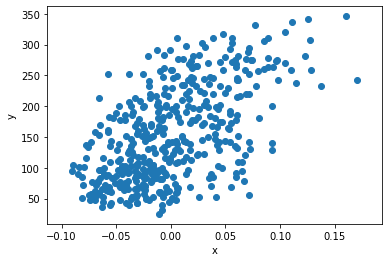

In [26]:
plt.scatter(x, y)
pt1 = ( -0.1, -0.1 * w + b )
pt2 = (0.15, 0.15 * w +b)

plt.xlabel('x')
plt.ylabel('y')
plt.show()

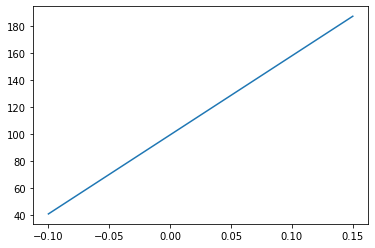

In [27]:
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])

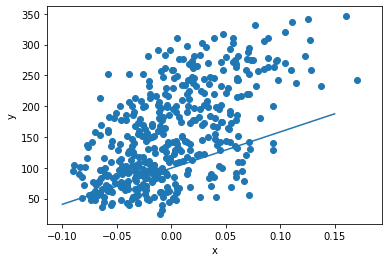

In [28]:
plt.scatter(x, y)
pt1 = ( -0.1, -0.1 * w + b )
pt2 = (0.15, 0.15 * w +b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 여러 애포크를 반복하기

In [29]:
for i in  range(1, 100):
  for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err
print(w, b)

913.5973364345905 123.39414383177204


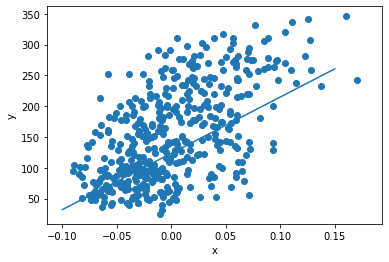

In [30]:
plt.scatter(x, y)
pt1 = ( -0.1, -0.1 * w + b )
pt2 = (0.15, 0.15 * w +b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

y^ = 913.6x + 123.4

In [31]:
x_new = 0.18
y_pred = x_new * w + b
print(y_pred)

287.8416643899983


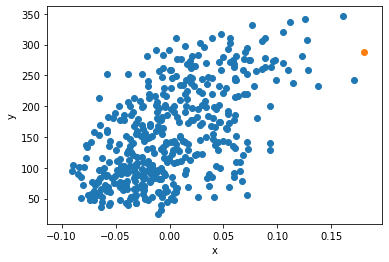

In [32]:
plt.scatter(x, y)
plt.scatter(x_new, y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
